In [1]:
import pandas as pd
import numpy as np
from __future__ import division

cars10 = pd.read_csv("C:/Users/vinayak tyagi/Downloads/c2010.csv")
cars11 = pd.read_csv("C:/Users/vinayak tyagi/Downloads/c2011.csv")

cars10.head(5)

,Unnamed: 0,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,1088,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,1089,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,1090,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,1091,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,1092,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


In [2]:
cars10.count()
cars11.count()

Unnamed: 0             245
EngDispl               245
NumCyl                 245
Transmission           245
FE                     245
AirAspirationMethod    245
NumGears               245
TransLockup            245
TransCreeperGear       245
DriveDesc              245
IntakeValvePerCyl      245
ExhaustValvesPerCyl    245
CarlineClassDesc       245
VarValveTiming         245
VarValveLift           245
dtype: int64

In [3]:
print(cars10.shape)
print(cars11.shape)

(1107, 15)
(245, 15)


In [4]:
c10_feat = cars10.get(['EngDispl'])
c10_label = cars10.get(['FE'])
c11_feat = cars11.get(['EngDispl'])
c11_label = cars11.get(['FE'])

In [5]:
c10_feat.head(5)

,EngDispl
0,4.7
1,4.7
2,4.2
3,4.2
4,5.2


In [6]:
c10_label.head(5)

,FE
0,28.0198
1,25.6094
2,26.8000
3,25.0451
4,24.8000


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt


# for some default confrig rcParams stands for row col parameter
plt.rcParams['figure.figsize'] = 10 ,7.5
plt.rcParams['axes.grid'] = True
plt.gray()

<Figure size 720x540 with 0 Axes>

Text(0.06,0.5,'Fuel Efficency')

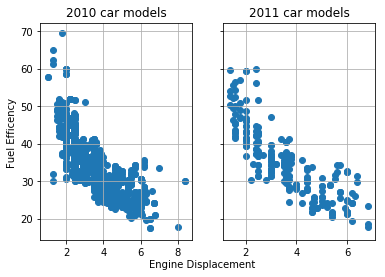

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)

ax1.scatter(c10_feat, c10_label)
ax1.set_title("2010 car models")

ax2.scatter(c11_feat, c11_label)
ax2.set_title("2011 car models")

fig.text(0.5, 0.04, "Engine Displacement", ha = 'center' , va ='center')
fig.text(0.06, 0.5, "Fuel Efficency", ha = 'center', va = 'center' , rotation = 'vertical')

In [9]:
# rmse or cost funtion defining a funtion rmse 

from sklearn.metrics import mean_squared_error

def rmse(y_actual, y_predicit):
         return np.sqrt(mean_squared_error(y_actual , y_predicit))

In [10]:
# liner regression

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(c10_feat, c10_label)

# intersept is c & coef is m in y = mx+c
print ("Least square estimate: intercept = {0}, coefficient ={1}".format(reg.intercept_, reg.coef_[0]))

Least square estimate: intercept = [50.56322991], coefficient =[-4.52092928]


Text(0,0.5,'Predicted')

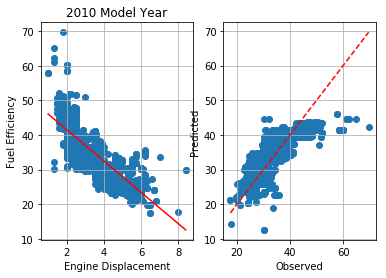

In [11]:
X = np.linspace(np.min(c10_feat)[0], np.max(c10_feat)[0])[:, np.newaxis]
y = reg.predict(X)
cars10_label_pridict = reg.predict(c10_feat)
y_range = np.linspace(np.min(c10_label)[0], np.max(c10_label)[0])[:, np.newaxis]

# print(X); print(y); print(cars10_label_pridict); print(y_range)

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.scatter(c10_feat, c10_label)
ax1.plot(X,y, 'r')
ax1.set_title('2010 Model Year')
ax1.set_xlabel('Engine Displacement')
ax1.set_ylabel('Fuel Efficiency')

ax2.scatter(c10_label, cars10_label_pridict)
ax2.plot(y_range, y_range, 'r--')
ax2.set_xlabel('Observed')
ax2.set_ylabel('Predicted')

In [12]:
# calculate root mean square error (RMSE)
from sklearn.model_selection import cross_val_score

scores = np.sqrt(np.abs(cross_val_score(reg, c10_feat, c10_label, cv=10, scoring='neg_mean_squared_error')))
print ("RMSE: {0}".format(np.mean(scores)))

RMSE: 4.72774096020463


In [13]:
# quadratic model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# hence the degree of co-oefficient is incresed so we used pipeline
quad = make_pipeline(PolynomialFeatures(2), LinearRegression())
quad.fit(c10_feat, c10_label)

scores = np.sqrt(np.abs(cross_val_score(quad, c10_feat, c10_label, cv=10, scoring='neg_mean_squared_error')))
print ("RMSE: {0}".format(np.mean(scores)))

RMSE: 4.34528462825047


Text(0,0.5,'Predicted')

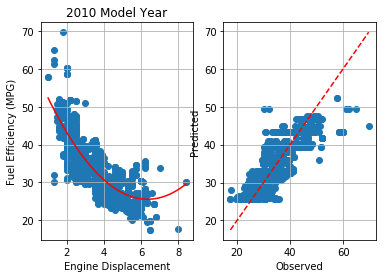

In [14]:
X = np.linspace(np.min(c10_feat)[0], np.max(c10_feat)[0])[:, np.newaxis]
y = quad.predict(X)
cars10_target_pred = quad.predict(c10_feat)
y_range = np.linspace(np.min(c10_label)[0], np.max(c10_label)[0])[:, np.newaxis]

# print(X); print(y); print(cars10_target_pred); print(y_range)
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(c10_feat, c10_label)
ax1.plot(X, y, 'r')
ax1.set_title('2010 Model Year')
ax1.set_xlabel('Engine Displacement')
ax1.set_ylabel('Fuel Efficiency (MPG)')

ax2.scatter(c10_label, cars10_target_pred)
ax2.plot(y_range, y_range, 'r--')
ax2.set_xlabel('Observed')
ax2.set_ylabel('Predicted')